In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage import exposure


In [2]:
def show(img, title="", cmap=None):
    plt.figure(figsize=(4,4))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()


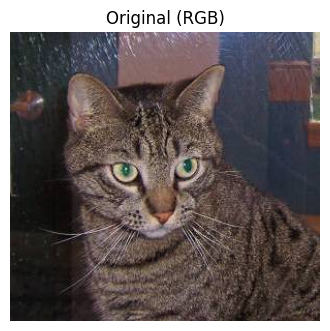

In [3]:
img = imread("Data/training_set/cats/cat.1.jpg")  # cambia el nombre a uno que exista
show(img, "Original (RGB)")


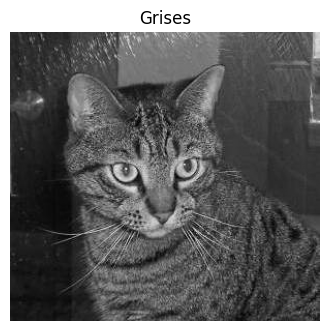

In [4]:
gray = rgb2gray(img)
show(gray, "Grises", cmap="gray")


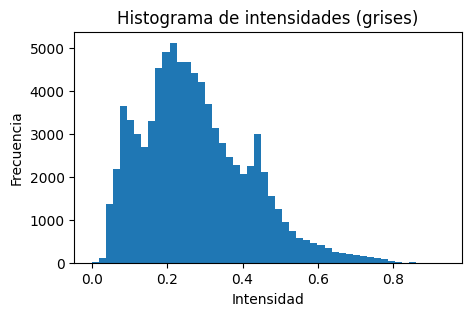

In [5]:
plt.figure(figsize=(5,3))
plt.hist(gray.ravel(), bins=50)
plt.title("Histograma de intensidades (grises)")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia")
plt.show()


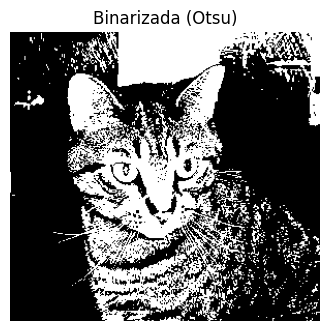

In [6]:
from skimage.filters import threshold_otsu

t = threshold_otsu(gray)
binary = gray > t
show(binary, "Binarizada (Otsu)", cmap="gray")


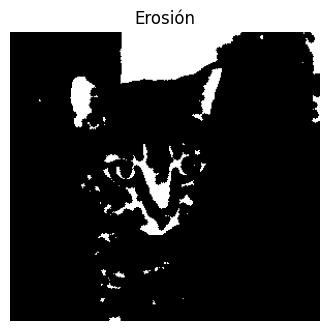

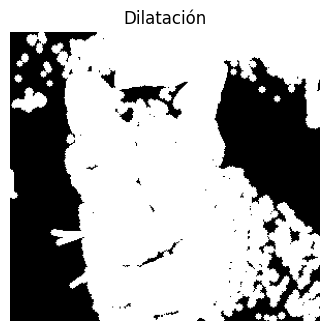

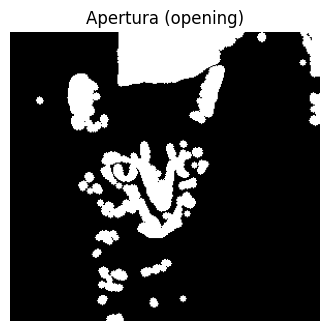

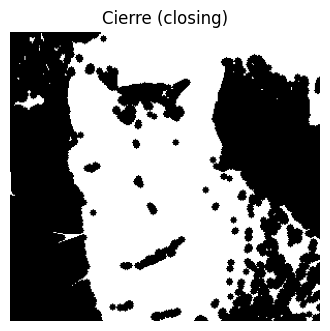

In [7]:
from skimage.morphology import erosion, dilation, opening, closing, disk

se = disk(3)

er = erosion(binary, se)
di = dilation(binary, se)
op = opening(binary, se)
cl = closing(binary, se)

show(er, "Erosión", cmap="gray")
show(di, "Dilatación", cmap="gray")
show(op, "Apertura (opening)", cmap="gray")
show(cl, "Cierre (closing)", cmap="gray")


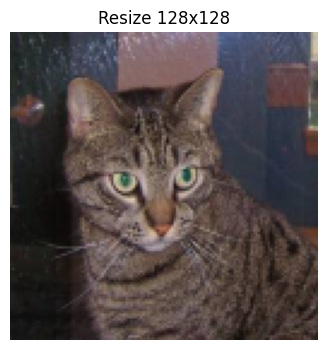

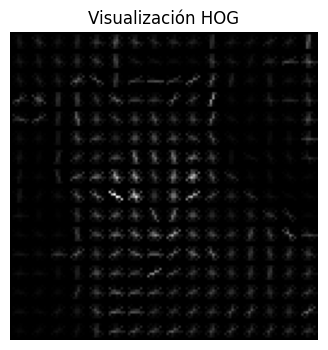

(8100,
 array([0.24598619, 0.0622136 , 0.06531573, 0.01224493, 0.08884697,
        0.        , 0.19113853, 0.24598619, 0.24598619, 0.24598619]))

In [8]:
from skimage.feature import hog

img_small = resize(img, (128, 128))  # tamaño fijo para que el vector HOG sea consistente
fd, hog_image = hog(
    img_small,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    visualize=True,
    channel_axis=-1
)

hog_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
show(img_small, "Resize 128x128")
show(hog_rescaled, "Visualización HOG", cmap="gray")
len(fd), fd[:10]
